In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tools import load_nyt_database, word_freq, GetTemporalNIH, GetTemporalNSF, GetTemporalPsyc, IsValidYear
import itertools
from matplotlib.ticker import ScalarFormatter, LogFormatterMathtext

In [2]:
%matplotlib inline

In [3]:
nyt = load_nyt_database()
psyc = GetTemporalPsyc()
nih = GetTemporalNIH()
nsf = GetTemporalNSF()

In [24]:
def plot_all(words, norm=True):
    df1 = word_freq(words)
    y = df1
    if norm:
     y = y/ y.mean()
    axis_1 = y.plot(figsize=(24,6))
    axis_1.set_title("Google Book Ngrams", fontsize=24)
    axis_1.set_xlabel("Year")
    _ = axis_1.legend(loc='upper left', ncol=2)
    axis_1.set_yscale('log') # You can disable
    if norm:
      axis_1.set_ylim(1e-2, 1e2) # You can disable
    axis_1.yaxis.set_major_formatter(LogFormatterMathtext())     
    axis_1.grid(True)
    axis_1.set_xlim(xmin=1800)
    axis_1.set_xlabel("Year", fontsize=20)
    axis_1.set_ylabel("Percentage of historical average", fontsize=20)

    y = pd.rolling_mean(nyt[words], 10)
    if norm:
     y = y/ y.mean()
    axis_2 = y.plot(figsize=(24,6))
    axis_2.set_title("New York Times", fontsize=24)
    axis_2.set_yscale('log') # You can disable
    axis_2.set_ylabel("Percentage of historical average", fontsize=20)
    axis_2.set_xlabel("Year", fontsize=20)
    if norm:
      axis_2.set_ylim(1e-2, 1e2) # You can disable
    else:
      axis_2.set_ylim(ymin=1e-7) # You can disable        
    axis_2.yaxis.set_major_formatter(LogFormatterMathtext())
    axis_2.grid(True)
    axis_2.set_xlim(xmin=1800)
    _ = axis_2.legend(loc='upper left', ncol=2)
    
    for title, data in {"Psyc Info Metadata":psyc, "NIH Grants": nih, "NSF Grants": nsf}.items():
        y = data[words]
        y = pd.rolling_mean(y, 3)
        if norm:
          y = y / y.mean()
        axis = y.plot(figsize=(24,6))
        axis.set_title(title, fontsize=24)
        axis.set_xlabel("Year", fontsize=20)
        axis.set_ylabel("Percentage of historical average", fontsize=20)
        #axis_3.set_yscale('log') # You can disable    
        axis.set_xlim(xmin=1975)
        axis.grid(True)
        _ = axis.legend(loc='upper left', ncol=2)
        

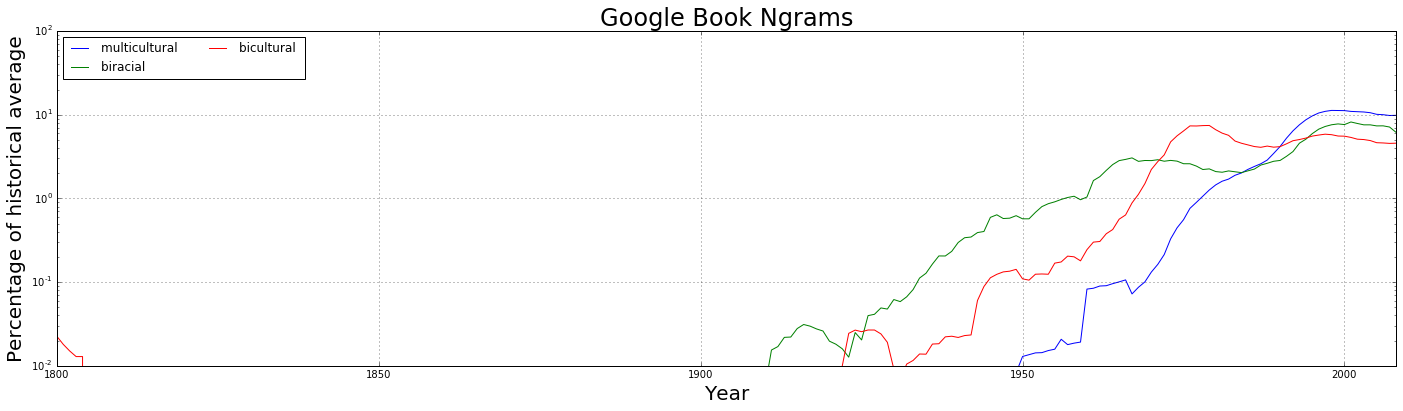

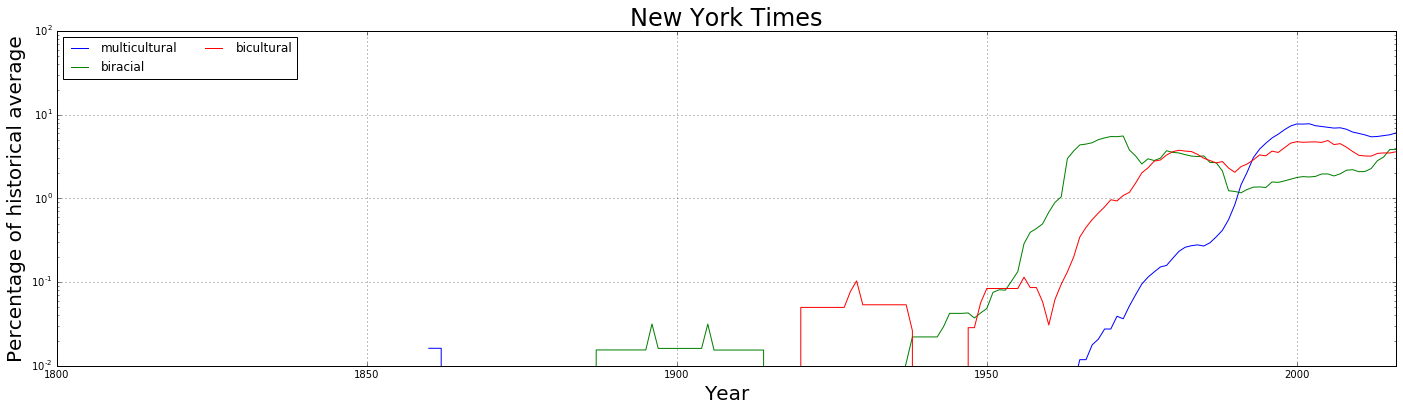

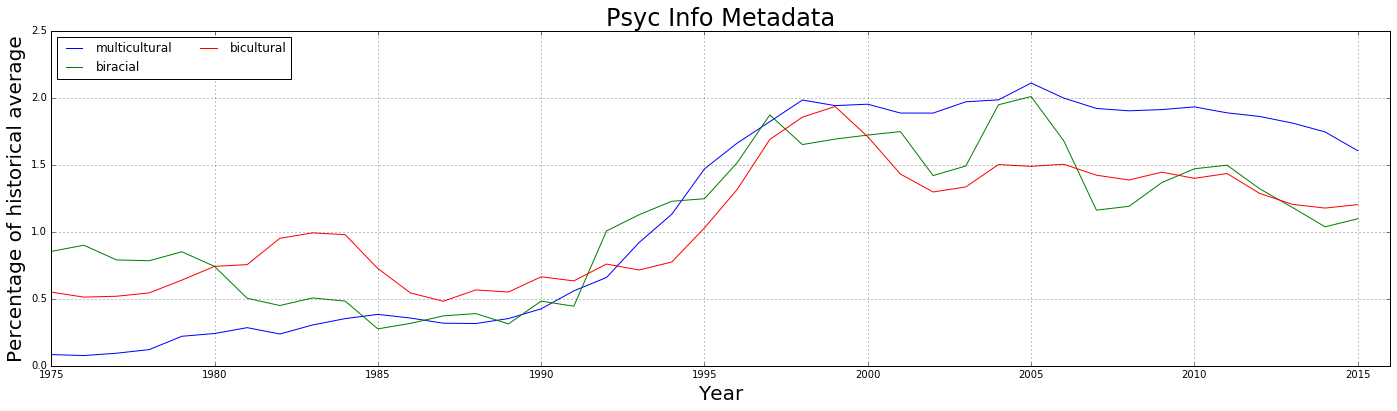

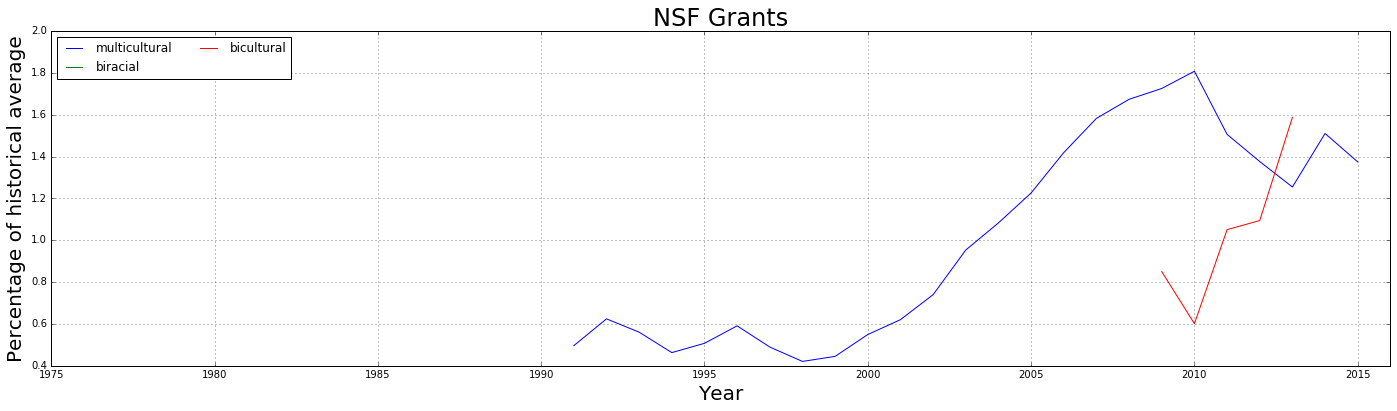

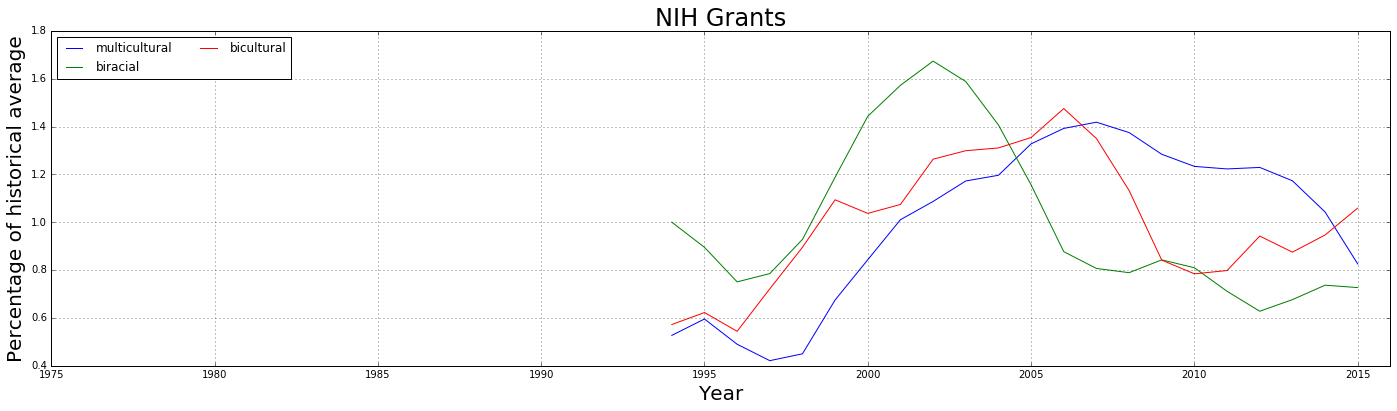

In [25]:
words = ["multicultural", "biracial", "bicultural"]
plot_all(words)